## Cifar 10 data set, DNNs, and CNNs

In [23]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.backend as K 

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.layers import  BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import cifar10



In [3]:



NUM_CLASSES = 10




In [4]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 22s 0us/step


In [5]:



x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)




In [6]:

x_train.shape


(50000, 32, 32, 3)

In [7]:

x_train[54, 12, 13, 1] 


0.36862746


## NN Architecture


In [9]:



input_layer = Input( (32,32,3) )

x = Flatten()(input_layer)       ## flatten to vector of size 32x32x3
                                 ## we flatten the input because Dense() requires it.

x            = Dense(200, activation = 'relu')(x)
x            = Dense(150, activation = 'relu')(x)
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)


model = Model(input_layer, output_layer)




In [10]:


model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________



## Train


In [12]:


opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



In [13]:

model.fit(x_train, 
          y_train,
          batch_size=32, 
          epochs=10, 
          shuffle=True
)


Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8517 - accuracy: 0.3327
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6753 - accuracy: 0.4039
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5904 - accuracy: 0.4328
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5347 - accuracy: 0.4560
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4966 - accuracy: 0.4683
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4624 - accuracy: 0.4808
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4340 - accuracy: 0.4899
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4113 - accuracy: 0.4971
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3830 - accuracy: 0.5077
Epoch 10/10
1563/1563 [==============================] - 15s 10m

## Evaluate

In [14]:

model.evaluate(x_test, y_test)


313/313 [==============================] - 5s 5ms/step - loss: 1.4686 - accuracy: 0.4837


[1.4686288833618164, 0.4837000072002411]

In [15]:



CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)





313/313 [==============================] - 2s 5ms/step


In [16]:
preds.shape

(10000, 10)

In [17]:
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [18]:
preds_single.shape

(10000,)

## Visualize preds 

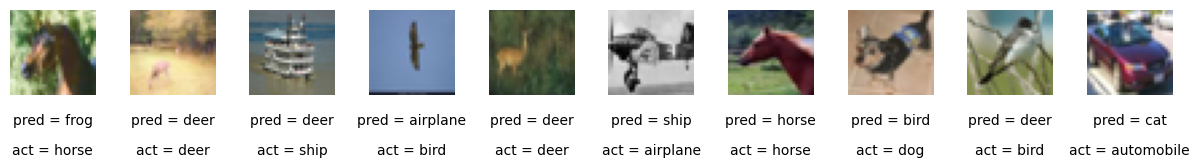

In [19]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)



## Improving results with a CNN


In [20]:



input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10, 
    kernel_size = (4,4), 
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20, 
    kernel_size = (3,3), 
    strides = 2, 
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)




In [21]:



model.summary()




Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


## Batch Normalization

Just like we normalized the inputs at the beginning, it has been found that normalizing outputs from one layer to the next as the model is learning is a good idea. BatchNormalization() does that. It calculates the mean and standard deviation for the given batch and normalizes. 



## A deeper CNN architecture


In [25]:

input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)


In [26]:


model.summary()



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

## Train

In [27]:


opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



In [28]:


model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True, 
          validation_data = (x_test, y_test)
)



Epoch 1/10
1563/1563 [==============================] - 162s 103ms/step - loss: 1.5463 - accuracy: 0.4600 - val_loss: 1.2061 - val_accuracy: 0.5697
Epoch 2/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.1443 - accuracy: 0.5994 - val_loss: 0.9945 - val_accuracy: 0.6491
Epoch 3/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.0005 - accuracy: 0.6508 - val_loss: 1.0083 - val_accuracy: 0.6421
Epoch 4/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.9172 - accuracy: 0.6796 - val_loss: 0.9580 - val_accuracy: 0.6629
Epoch 5/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.8547 - accuracy: 0.7015 - val_loss: 0.9445 - val_accuracy: 0.6732
Epoch 6/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.8124 - accuracy: 0.7178 - val_loss: 0.9288 - val_accuracy: 0.6824
Epoch 7/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.7684 - accuracy: 0.7345 - val_loss: 

## The Weights of a layer

In [30]:
model.layers[5].get_weights()

[array([1.04395   , 1.0631986 , 1.1635264 , 0.8719836 , 0.90378964,
        0.96637434, 1.1965503 , 0.8839122 , 1.0188328 , 0.7796758 ,
        0.8977189 , 0.94992304, 0.9621122 , 1.0931835 , 1.1594157 ,
        1.2337941 , 1.0288774 , 0.98957056, 1.0074879 , 0.90016085,
        0.9104879 , 0.9791203 , 0.8775882 , 0.9837474 , 0.8486142 ,
        0.87396157, 1.2037668 , 0.836156  , 1.0547192 , 1.0735583 ,
        0.9238689 , 1.1673065 ], dtype=float32),
 array([-0.00959744, -0.11411637, -0.14467275, -0.20986028, -0.02056167,
        -0.14140926, -0.09131937, -0.0914152 , -0.1823384 , -0.05585668,
        -0.23745398, -0.07892776, -0.18185061, -0.15398715, -0.02646533,
        -0.11270432, -0.1693476 , -0.05770033, -0.15114492, -0.1548755 ,
        -0.2040357 , -0.16439648, -0.19139668, -0.11656585, -0.08145167,
        -0.09272238, -0.09990391, -0.21890976, -0.05342704,  0.02138322,
        -0.05545385, -0.07076769], dtype=float32),
 array([ 0.49159592, -0.6935318 , -0.5446623 ,  0.3034

## Evaluate

In [31]:


model.evaluate(x_test, y_test, batch_size=1000)



10/10 [==============================] - 3s 298ms/step - loss: 0.8662 - accuracy: 0.7052


[0.8661573529243469, 0.7052000164985657]

In [32]:


CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)




313/313 [==============================] - 7s 21ms/step


In [33]:
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

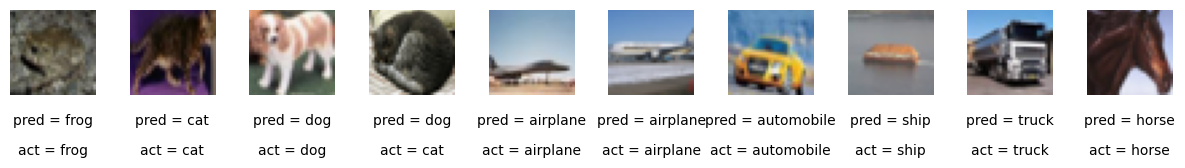

In [34]:



import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


